# CS445 Final Project: Face Swapping

### Group Members:

Hongxiao Chen, Shuai Wei, Zhexuan Yin

### Motivation
The objective for this project is to be able to capture a facial expression from one image and put it on another person. The motivation for this project is that people may want to capture an expression from another person, and then be able to apply it to another image. By completing this project, we hope to learn how to capture facial expression and blend naturally onto another image. 

## Setup

In [1]:
import cv2
import dlib
from matplotlib import pyplot as plt

## Part 1: Landmark & Triangulation source image

In [9]:
# Load from dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("utils/shape_predictor_68_face_landmarks.dat")

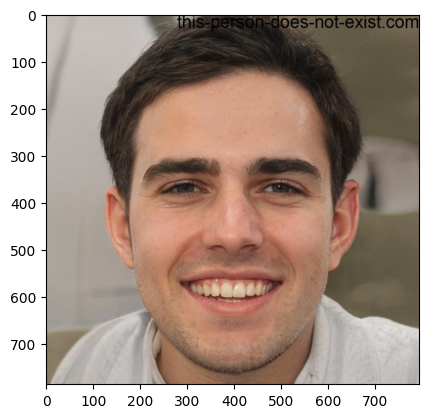

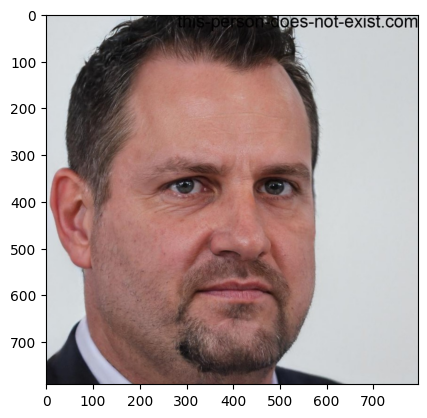

In [6]:
# Import
img_src = cv2.imread("images/test1.jpg")
img_src_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
plt.imshow(img_src[:, :, [2, 1, 0]])

plt.figure()
img_dst = cv2.imread("images/test3.jpg")
img_dst_gray= cv2.cvtColor(img_dst, cv2.COLOR_BGR2GRAY)
plt.imshow(img_dst[:, :, [2, 1, 0]])

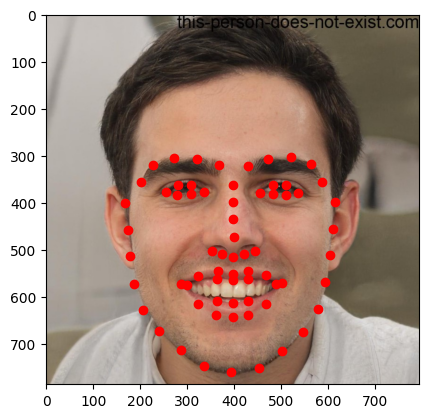

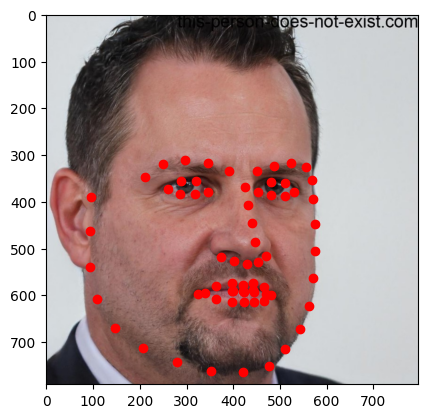

In [19]:
# Find landmark points
faces = detector(img_src)
src_landmarks_points = []
for face in faces:
    landmarks = predictor(img_src_gray, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        src_landmarks_points.append((x, y))

plt.figure()
plt.imshow(img_src[:, :, [2, 1, 0]])
for point in src_landmarks_points:
    plt.plot(point[0], point[1], marker = "o", markeredgecolor = "red", markerfacecolor = "red")

faces = detector(img_dst)
dst_landmarks_points = []
for face in faces:
    landmarks = predictor(img_dst_gray, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        dst_landmarks_points.append((x, y))

plt.figure()
plt.imshow(img_dst[:, :, [2, 1, 0]])
for point in dst_landmarks_points:
    plt.plot(point[0], point[1], marker = "o", markeredgecolor = "red", markerfacecolor = "red")

## Part 2: Triangulation destination image & Extract and warp triangles

## Part 3: Link the warped triangles together & Replace the face on the destination image